In [7]:
from keras.datasets import imdb
from keras.preprocessing import sequence

In [8]:
max_features = 10000
maxlen = 500 
batch_size = 32

In [13]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words = max_features)
print(len(input_train), 'train_sequences')
print(len(input_test), 'test_sequences')

25000 train_sequences
25000 test_sequences


In [16]:
input_train = sequence.pad_sequences(input_train, maxlen= maxlen)
input_test = sequence.pad_sequences(input_test, maxlen= maxlen)
print('input_train shape :', input_train.shape)
print('input_test shape :', input_test.shape)

input_train shape : (25000, 500)
input_test shape : (25000, 500)


In [20]:
from keras.layers import Dense, Embedding, SimpleRNN
from keras.models import Sequential

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation = 'sigmoid'))

In [21]:
model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy', 
             metrics = ['acc'])

In [22]:
history = model.fit(input_train, y_train, epochs = 10, batch_size = 128, validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 11s 67ms/step - loss: 0.6567 - acc: 0.5959 - val_loss: 0.5018 - val_acc: 0.7652
Epoch 2/10
157/157 [==============================] - 10s 66ms/step - loss: 0.4344 - acc: 0.8087 - val_loss: 0.5155 - val_acc: 0.7438
Epoch 3/10
157/157 [==============================] - 10s 65ms/step - loss: 0.3179 - acc: 0.8701 - val_loss: 0.3551 - val_acc: 0.8558
Epoch 4/10
157/157 [==============================] - 10s 65ms/step - loss: 0.2424 - acc: 0.9101 - val_loss: 0.4325 - val_acc: 0.8136
Epoch 5/10
157/157 [==============================] - 10s 66ms/step - loss: 0.1796 - acc: 0.9342 - val_loss: 0.4376 - val_acc: 0.8356
Epoch 6/10
157/157 [==============================] - 10s 65ms/step - loss: 0.1225 - acc: 0.9579 - val_loss: 0.4020 - val_acc: 0.8548
Epoch 7/10
157/157 [==============================] - 10s 66ms/step - loss: 0.0862 - acc: 0.9720 - val_loss: 0.4385 - val_acc: 0.8500
Epoch 8/10
157/157 [==============================] - 10s 65ms

In [30]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

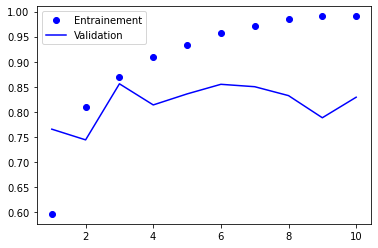

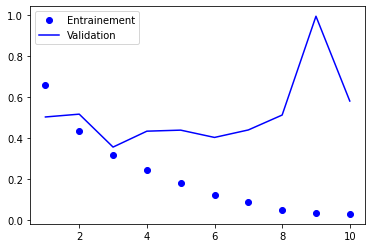

In [37]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label = 'Entrainement')
plt.plot(epochs, val_acc, 'b', label = 'Validation')
plt.legend()

plt.figure()

epochs = range(1, len(acc)+1)
plt.plot(epochs, loss, 'bo', label = 'Entrainement')
plt.plot(epochs, val_loss, 'b', label = 'Validation')
plt.legend()

plt.show()

In [40]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation = 'sigmoid'))

In [42]:
model.compile(optimizer = 'Adam',
              loss = 'binary_crossentropy',
             metrics = ['acc'])

In [43]:
history = model.fit(input_train, y_train, batch_size = 128, validation_split = .2, epochs = 10)

Epoch 1/10
157/157 [==============================] - 27s 164ms/step - loss: 0.4908 - acc: 0.7667 - val_loss: 0.3394 - val_acc: 0.8598
Epoch 2/10
157/157 [==============================] - 27s 171ms/step - loss: 0.2878 - acc: 0.8879 - val_loss: 0.2953 - val_acc: 0.8802
Epoch 3/10
157/157 [==============================] - 29s 182ms/step - loss: 0.1876 - acc: 0.9317 - val_loss: 0.2958 - val_acc: 0.8802
Epoch 4/10
157/157 [==============================] - 28s 176ms/step - loss: 0.1390 - acc: 0.9528 - val_loss: 0.3261 - val_acc: 0.8760
Epoch 5/10
157/157 [==============================] - 28s 178ms/step - loss: 0.1137 - acc: 0.9637 - val_loss: 0.3568 - val_acc: 0.8710
Epoch 6/10
157/157 [==============================] - 28s 179ms/step - loss: 0.0948 - acc: 0.9696 - val_loss: 0.4260 - val_acc: 0.8730
Epoch 7/10
157/157 [==============================] - 28s 179ms/step - loss: 0.0771 - acc: 0.9769 - val_loss: 0.4647 - val_acc: 0.8688
Epoch 8/10
157/157 [==============================] - 2

In [44]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [49]:
max(history.history['val_acc'])

0.8802000284194946

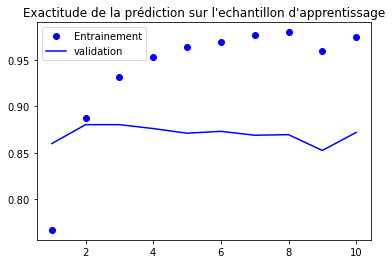

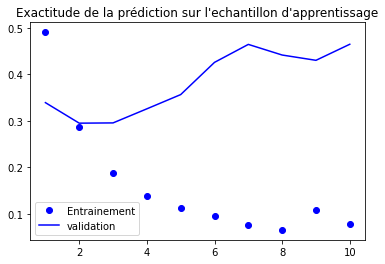

In [45]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(range(1, len(epochs)+1), acc, 'bo', label = 'Entrainement')
plt.plot(range(1, len(epochs)+1), val_acc, 'b', label = 'validation')
plt.title('Exactitude de la prédiction sur l\'echantillon d\'apprentissage')

plt.legend()

plt.figure()

plt.plot(range(1, len(epochs)+1), loss, 'bo', label = 'Entrainement')
plt.plot(range(1, len(epochs)+1), val_loss, 'b', label = 'validation')
plt.title('Exactitude de la prédiction sur l\'echantillon d\'apprentissage')

plt.legend()
plt.show()
